<a href="https://colab.research.google.com/github/paulokuriki/dicom_anonymizer/blob/main/dicom_anonymizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytesseract
!pip install pydicom

In [ ]:

from PIL import Image
import pytesseract
import pydicom
import os

try:
    # tenta montar o drive do google drive no google colab
    from google.colab import drive
    drive.mount('/content/drive')
    curr_path = "/content/drive/MyDrive/Colab Notebooks/Dicom_Anonymizer"
    !sudo add-apt-repository ppa:alex-p/tesseract-ocr-devel
    !sudo apt-get update
    !sudo apt install tesseract-ocr
except:
    # se deu erro, tenta montar local
    import os
    curr_path = os.getcwd()      
    # necessário ter o tesseract-ocr instalado na máquina. Recomendo usar a versao 5.00 Alpha
    # https://github.com/tesseract-ocr/tessdoc/blob/master/Installation.md
    pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# funcoes auxiliares para limpar o texto do OCR.
def limpa_texto(texto):
    texto = replace_text(texto, '  ', ' ')
    texto = replace_text(texto, '\n\n', '\n')
    texto = texto.strip('\n')
    texto = texto.strip()
    return texto

def replace_text(texto, procurado, troca):
    while procurado in texto:
        texto = texto.replace(procurado, troca)
    return texto

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/dasa_inova.png">

# Apresentação de trabalho premiado RSNA

### **More than Meets the Eyes: A Radiologist's Guide to DICOM Anonymization** 

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/magna.png">



---

### Agradecimentos

Marcelo S. Takahashi; Victor Marques; Matheus H. Ferreira; Edgar Nishiyama; Daniel Silva; Luis F. Ribeiro; Guilherme H. Magalhaes; Paulo E. Kuriki; Marcio Ricardo T. Garcia; Leonardo Vedolin; Felipe C. Kitamura

---

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/straus.jpeg">

Marcelo Straus

---



## DICOM - Digital Imaging and Communication in Medicine

É o padrão internacional para transmitir, armazenar, resgatar, imprimir, processar e visualizar informações de imagens médicas.

Criado pelo **ACR** e **NEMA** em 1983. Atualmente na terceira versão DICOM.

Refere-se a um **formato de arquivo** e também um **protocolo de comunicação**.

Torna possível a **interoperabilidade** de informações de imagens médicas

***Capacidade de um sistema se comunicar de forma transparente com outros sistemas***

---


## Estrutura do Arquivo DICOM

Você pode pensar em um arquivo DICOM como se fosse uma pasta em um computador. Essa pasta geralmente contém uma imagem, bem como outros dados, pode até conter outras “pastas”.

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/dicom_folder.png">

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/dicom_dataset.png">


---



## Estrutura do Arquivo DICOM: O Data Set

### Um  Data Set é composto por vários Data Elements (Tags DICOM)

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/dataelements.png">

---



## Os componenentes do Data Element (Tag DICOM):
*   Tem um identificador único, chamado **Tag**, representado por 8 caracteres.
*   Tem uma descrição única, chamada **Description**.
*   Tem um valor, chamado **Value**.

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/dataelements_color.png">


---



## **Data Elements**: O Pixel Data

**Pixel Data** é um Data Element especial que contém os dados da imagem propriamente dita (compõe a maior porcentagem do arquivo DICOM)

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/pixel_data.png">


---



## Data Elements numa imagem DICOM
<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/dicom_dataelements.png">


---



### Abrindo um arquivo DICOM no Python

In [4]:
from pydicom import dcmread                          # importa a função dcmread da biblioteca pydicom

dcm_file = os.path.join(curr_path, 'torax.dcm')      # define o caminho do arquivo DICOM de exemplo
dataset = dcmread(dcm_file)                          # usa a biblioteca pydicom para abrir o arquivo

In [5]:
dataset                                              # mostra o dataset do arquivo DICOM

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10.474.1859124697657802363485985676803825528.3
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.38'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10.474.1859124697657802363485985676803825528.3
(0008, 0020) Study Date   

### O Pixel Array

In [6]:
dataset.pixel_array.shape   # exibe a resolução da matrix (nro de linhas e colunas da imagem)

(512, 512)

In [7]:
dataset.pixel_array        # exibe o valor de cada pixel da matrix

array([[-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       ...,
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048]], dtype=int16)

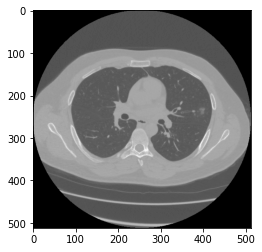

In [8]:
import matplotlib.pyplot as plt
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)    # passa a matriz do pixel data para o objeto pyplot
plt.show()                                           # exibe a imagem

## Desidentificação

Quantidade cada vez maior de dados médicos digitais disponíveis.

Desidentificação é utilizada para proteger a privacidade do paciente.

Terminologia é confusa

---



# A Desidentificação é realmente necessária?
---
<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/robust_deanonymization.png">
<hr>
<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/netflix.png">
<hr>
<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/imdb.jpg">
<hr>



# Trade-off
<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/deidentificacao.png">
<hr>


# Dados pseudonimizados

Utiliza-se um pseudônimo para substituir um identificador do paciente.

Dados ainda podem ser indiretamente identificados

**Exemplo:**

João Silva, masculino, dn 05/10/1975, peso = 52 kg

**`Paciente 1`**, masculino, dn 05/10/1975, peso = 52 kg


---



# Dados desidentificados

Todas as informações que poderiam identificar indiretamente o paciente são removidos/alterados.

Pode ser revertido. Usado frequentemente em radiologia.

**Exemplo:**

João Silva, masculino, dn 05/10/1975, peso = 52 kg

**`Paciente 1, entre 40 e 60 anos, peso entre 50-75 kg`**


# Dados anonimizados

Descaracterização  irreversível do dado.

Muito difícil de ser atingido e acaba limitando muito a utilidade do dado.

**Exemplo:**

João Silva, masculino, dn 05/10/1975, peso = 52 kg

**`48% da população é do gênero masculino`**

---




# Desidentificação de DICOM

Os dados que são considerados identificadores diretos ou indiretos devem ser removidos ou terem os seus valores alterados.

Pode ser realizada através de visualizadores DICOM, programas específicos (RSNA MIRC CTP) ou bibliotecas de programação (pydicom).

https://www.rsna.org/research/imaging-research-tools

---



# Desidentificando no Python

In [9]:
from pydicom import dcmread

dcm_file = os.path.join(curr_path, 'torax.dcm')      # define o caminho do arquivo DICOM de exemplo
dataset = dcmread(dcm_file)                          # abre o dataset do arquido DICOM

print('Nome', dataset.PatientName)                   # mostra o nome do paciente do DICOM
print('ID', dataset.PatientID)                       # mostra o Patient ID do DICOM

Nome SITE1-000138
ID SITE1-000138


In [10]:
dataset.PatientName = "SEM NOME"    # define um novo nome de paciente
dataset.PatientID = "ANON 00001"    # define um novo patient ID

# Conferindo o Dataset Alterado

In [11]:
dataset                              # mostra o conteúdo do dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10.474.1859124697657802363485985676803825528.3
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.38'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10.474.1859124697657802363485985676803825528.3
(0008, 0020) Study Date   

In [12]:
dataset.save_as("anon.dcm")         # salva o arquivo anonimizado em num novo arquivo dicom
print('Arquivo salvo com sucesso.')

Arquivo salvo com sucesso.


# Abrindo o arquivo anonimizado

In [13]:
dcm_file = os.path.join(curr_path, 'anon.dcm')       # define o caminho do arquivo DICOM de exemplo
dataset = dcmread(dcm_file)                          # abre o dataset do arquido DICOM

print('Nome', dataset.PatientName)                   # mostra o nome do paciente do DICOM
print('ID', dataset.PatientID)                       # mostra o Patient ID do DICOM

Nome SEM NOME
ID ANON 00001


# Desidentificação de DICOM

Os elementos de um arquivo DICOM podem ser classificados em três tipos:

**Tipo 1:** Obrigatório e precisa ter um valor
* Colunas e linhas da imagem, orientação da imagem...

**Tipo 2:** Obrigatório mas pode ser vazio
* ID do paciente, data de nascimento, sexo...

**Tipo 3:** Opcional
* Médico solicitante, grupo étnico, nome da instituição...


# Desidentificação de DICOM


### Dicas

* Se remover um DICOM Data Element, garanta que não é do tipo 1 ou 2

* Se apagar um valor de um Data Element, garante que não é do tipo 1

* Se substituir o valor de um Data Element, garante que está em conformidade com o formato DICOM. Ex: UIDs (StudyInstanceUID, SeriesInstanceUID, SOPInstanceUID) devem ter no máximo 64 caracteres. 

Estas informações podem ser acessadas na documentação DICOM http://dicom.nema.org/


# Dicas para desidentificação de DICOM

### Tags DICOM Privadas:
Tags Dicom que não estão incluídas na documentação DICOM padrão.

Estas Tags DICOM são geralmente geradas em situações específicas, seja durante a aquisição da imagem ou durante o processamento e pode conter informações sensíveis do paciente.

É SEMPRE recomendável que todas as Tags Privadas sejam removidas durante a desidentificação, mas em raras situações, esta remoção também pode corromper o arquivo DICOM (tomossíntese).

# Dicas para desidentificação de DICOM

### Modalidades SC, US e SR

Na ultrassonografia (US) e secondary capture (captura secundária – SC) os dados do paciente além de estar registrados estão também registrados no Pixel Data (própria imagem).

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/us_abdome.png">

# Dicas para desidentificação de DICOM

### Modalidades SC, US e SR

Quando usar imagens em apresentações, como no Power Point por exemplo, tenha certeza de que os pixels foram apagados da imagens

Crop, blocos, etc sobrepostos sobre os slides não apagam as informações sensíveis das imagens.

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/search_engines.png">

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/keeping_phi.png">

https://healthitsecurity.com/news/search-engines-may-expose-patient-health-information-acr-warns

https://www.acr.org/Practice-Management-Quality-Informatics/Informatics/PHI

# Usando OCR para identificar dados de imagens

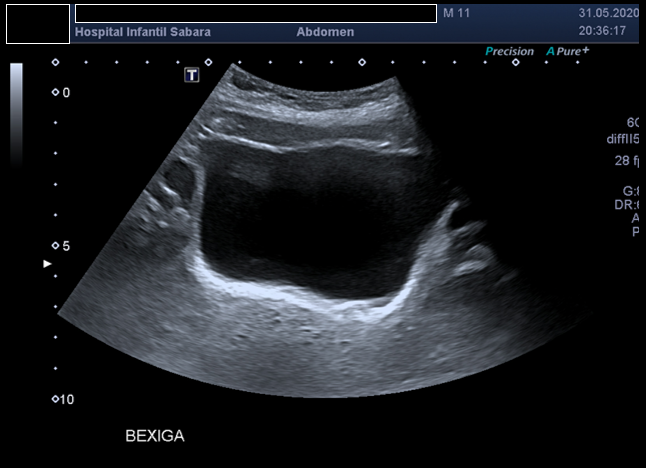

In [14]:
from PIL import Image
usg_file = os.path.join(curr_path, 'us_abdome.png')
img = Image.open(usg_file)
display(img)

In [15]:
texto_ocr = pytesseract.image_to_string(img)
texto_ocr = limpa_texto(texto_ocr)
print(texto_ocr)

Hospital Infantil Sabara
mit 31.05.2020
2
 
 
 
BEXIGA
Precision APure+
freee
6
iftts
28 f
Gt
DR


# Usando OCR para identificar dados de imagens

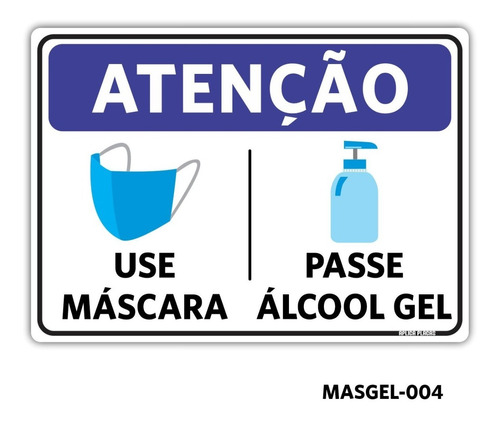

In [16]:
usg_file = os.path.join(curr_path, 'use_mascara.jpg')
img = Image.open(usg_file)
display(img)

In [17]:
texto_ocr = pytesseract.image_to_string(img)
texto_ocr = limpa_texto(texto_ocr)
print(texto_ocr)

[ ATENCAO
wif
USE PASSE
MASCARA _ALCOOL GEL
 
 
MASGEL-004


# De-identificação é suficiente?

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/face_1.png">

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/face_2.png">

 [Schwarz, Christopher G., et al. "Identification of anonymous MRI research participants with face-recognition software." New England Journal of Medicine 381.17 (2019): 1684-1686.](https://pubmed.ncbi.nlm.nih.gov/31644852/)


<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/kita_3d.jpeg">

<img src="https://raw.githubusercontent.com/paulokuriki/dicom_anonymizer/main/kita_style.png">

# Take Home message

### Um arquivo DICOM contém muito mais dados que uma simples IMAGEM.

### Desidentificar dados não é uma tarefa muito complexa, mas requer atenção aos detalhes.

### Encontrar um equilíbrio entre segurança do paciente e privacidade, mantendo a utilidade dos dados, é a chave.


[https://github.com/paulokuriki/dicom_anonymizer](https://github.com/paulokuriki/dicom_anonymizer/blob/main/dicom_anonymizer.ipynb)